In [1]:
# import general libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats

In [4]:
# import dataset
df = pd.read_csv("C:/Users/teena/OneDrive/Documents/Data analytics/05/In-class Exercise_data preparation/titanic-dataset-cleaning/titanic-dataset-cleaning/train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


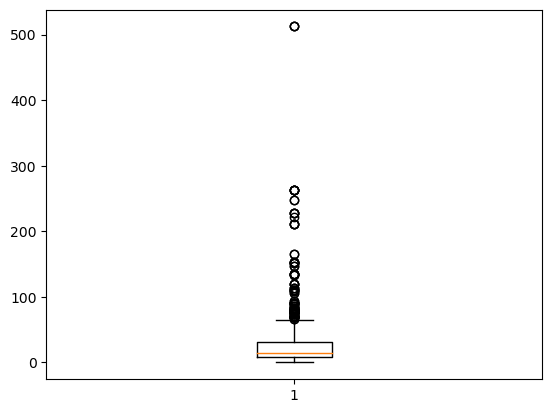

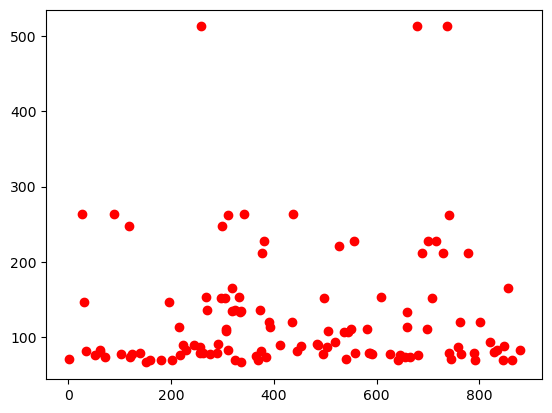

In [22]:
# Check for outliers
# Calculate the IQR for a specific column in the dataset
column_name = "Fare"
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1


# Identify outliers as values outside the range (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR)
outliers = df[(df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR))]



# Plot the data and highlight the outliers
plt.boxplot(df[column_name])
plt.show()
plt.scatter(x=outliers.index, y=outliers[column_name], color='red')
plt.show()

In [19]:
# Check for inconsistent data format

# Check the data types of the columns in the dataset
print(df.dtypes)

# Convert specific columns to a specific data type if necessary
df['Fare'] = df['Fare'].astype(float)

# Define the subset of columns to check for non-numeric characters
columns_to_check = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Check if any columns contain non-numeric characters
for column_name in columns_to_check:
    for value in df[column_name]:
        try:
            float(value)
        except ValueError:
            print(f"Column {column_name} contains non-numeric value: {value}")


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [18]:
# Check for duplicates in the dataset
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Drop the duplicate rows in the dataset
df = df.drop_duplicates()

Number of duplicate rows: 0


In [23]:
# Check for invalid data


# Check for invalid data in the 'age' column
invalid_age_rows = df[(df['Age'] < 0) | (df['Age'] > 100)]
if not invalid_age_rows.empty:
    print("Invalid values found in the 'age' column:")
    print(invalid_age_rows[['Age']])

# Check for invalid data in the 'fare' column
invalid_fare_rows = df[(df['Fare'] < 0) | (df['Fare'] > 500)]
if not invalid_fare_rows.empty:
    print("Invalid values found in the 'fare' column:")
    print(invalid_fare_rows[['Fare']])

# Check for invalid data in the 'embarked' column
valid_values = ['C', 'Q', 'S']
invalid_embarked_rows = df[~df['Embarked'].isin(valid_values)]
if not invalid_embarked_rows.empty:
    print("Invalid values found in the 'embarked' column:")
    print(invalid_embarked_rows[['Embarked']])

# Check for invalid data in the 'sex' column
valid_values = ['male', 'female']
invalid_sex_rows = df[~df['Sex'].isin(valid_values)]
if not invalid_sex_rows.empty:
    print("Invalid values found in the 'sex' column:")
    print(invalid_sex_rows[['Sex']])


Invalid values found in the 'fare' column:
         Fare
258  512.3292
679  512.3292
737  512.3292
Invalid values found in the 'embarked' column:
    Embarked
61       NaN
829      NaN


In [26]:
# Handle missing values

# Option 1: Drop missing values
df.dropna(inplace=True)

# Option 2: Fill missing values with mean/median/mode
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [25]:
# Check for outliers
# Option 1: Z-Score
z = np.abs(scipy.stats.zscore(df["Fare"]))
print(z)

# Option 2: Interquartile Range (IQR)
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(df[(df["Fare"] < lower) | (df["Fare"] > upper)])

# Handle outliers
# Option 1: Drop outliers
df = df[(z < 3)]

# Option 2: Replace outliers with mean/median/mode
df["Fare"][df["Fare"] < lower] = lower
df["Fare"][df["Fare"] > upper] = upper

0      0.502445
1      0.786845
2      0.488854
3      0.420730
4      0.486337
         ...   
886    0.386671
887    0.044381
888    0.176263
889    0.044381
890    0.492378
Name: Fare, Length: 891, dtype: float64
    PassengerId  Survived  Pclass  \
1             2         1       1   
27           28         0       1   
31           32         1       1   
34           35         0       1   
52           53         1       1   
..          ...       ...     ...   
846         847         0       3   
849         850         1       1   
856         857         1       1   
863         864         0       3   
879         880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
34                     

C:\Users\teena\AppData\Local\Temp\ipykernel_26148\636697426.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Fare"][df["Fare"] > upper] = upper


In [24]:
# Check for inconsistent data format
# Option 1: Check data type of columns
print(df.dtypes)

# Option 2: Check unique values of columns
print(df["Embarked"].unique())

# Handle inconsistent data format
# Option 1: Convert data type of columns
df["PassengerId"] = df["PassengerId"].astype(str)

# Option 2: Replace inconsistent values with most frequent value
df["Embarked"].replace({"C": "S"}, inplace=True)

PassengerId     object
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
['S' 'Q' nan]
